The sparks foundation
Graduate Rotational Internship Program (GRIP)
# Data Science & Business Analytics Internship

# Author: Mst. Rubayat Yasmin
 Batch : GRIPMARCH22

# Task 1 :
Predict the percentage of a student based on the no. of study hours.

Dataset can be found at: http://bit.ly/w-data

Required prediction - What will be predicted score if a student studies for 9.25 hrs/ day?

# Step 1

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2
importing dataset and extract information

In [4]:
# Reading data from the given URL.
df_url = "http://bit.ly/w-data"
data=pd.read_csv(df_url)

#having a look at the shape of the given dataset
data.shape

(25, 2)

It's a small dataset. We got 25 columns and 2 rows to calculate only. Now, let's take a look at the dataset

In [20]:
#print the first 5 rows
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#check for null values
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
# alternatievly we can use info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As it's a small dataset, so in a glimpse we can see that we don't have any null values. But, if we had large dataset we can use info to evaluate the total dataset. Here, we can see that we got 0 null values amongst 25 entries and we can see the data tyoe also. 

In [8]:
# describe the dataset to get a better view
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We got the statistical insight of the data. now, let's find out the correlation. 

In [9]:
#find out the correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Here, we can see that there is positive correlation between score and hours. and the value of correlation is 0.976191

# Step 3
Visualize dataset

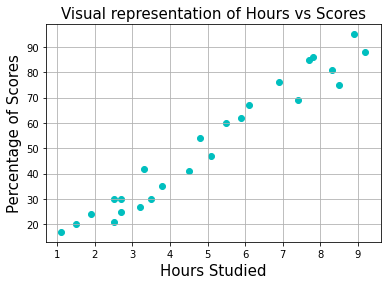

In [19]:
#visualize the data
plt.scatter(x = data["Hours"], y = data["Scores"], color = 'c')
plt.title("Visual representation of Hours vs Scores",fontsize=15)
plt.xlabel("Hours Studied", fontsize=15)
plt.ylabel("Percentage of Scores", fontsize=15)
plt.grid()
plt.show()

The above graph shows a Linear Relation between Hours and Scores

# Step 4
Prepareing data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [27]:
X=data.iloc[:,:-1].values         #Hours
Y=data.iloc[:,1].values           #scores

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Step 5
Deploy LR model

In [29]:
#import linear regression
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg


LinearRegression()

In [30]:
#fit the model
linReg.fit(x_train,y_train)

LinearRegression()

In [31]:
print("model intercept : ",linReg.intercept_)
print("model coefficient: ",linReg.coef_)

model intercept :  2.018160041434662
model coefficient:  [9.91065648]


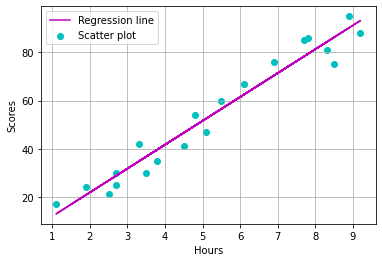

In [37]:
# calculating linear line
line = linReg.coef_ * X + linReg.intercept_

#plot linear regression
plt.scatter(x_train , y_train , color = "c", label='Scatter plot')
plt.plot(X , line , color = "m", label='Regression line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid()
plt.show()

# Step 6
Prediction



In [38]:
Y_pred = linReg.predict(x_test)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [43]:
# Comparing Actual vs Predicted
df_predict = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : Y_pred.reshape(1,-1)[0]})
df_predict

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


# Step 7
Calculating the model accuracy

In [44]:
df_sorted = df_predict.sort_values(by = "Hours")
df_sorted

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
3,2.5,30,26.794801
1,3.2,27,33.732261
4,5.9,62,60.491033
2,7.4,69,75.357018


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


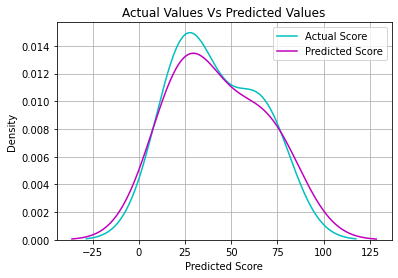

In [45]:
#make a plot
title = "Actual Values Vs Predicted Values"
ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "c" , label = "Actual Score")
sns.distplot(df_sorted["Predicted Score"] , hist = False , color = "m" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

In [49]:
#evaluating the model
from sklearn.metrics import r2_score
from sklearn import metrics

mean_absolute_error=metrics.mean_absolute_error(y_test,Y_pred)
print('Mean absolute error:',mean_absolute_error)

corr=r2_score(y_train,linReg.predict(x_train))
print('correlation:',corr)

acc=r2_score(y_test,Y_pred)
print('Accuracy of the model:',acc)

Mean absolute error: 4.183859899002982
correlation: 0.9515510725211552
Accuracy of the model: 0.9454906892105354


Model accuracy is 95% which is good in my openion. 

# Step 8

# Final answer - What will be predicted score if a student studies for 9.25 hrs/ day?

In [51]:
hrs = 9.25
pred = linReg.predict([[hrs]])
print("The predicted score if a student studies for 9.25 hrs/ day is", pred)

The predicted score if a student studies for 9.25 hrs/ day is [93.69173249]


# Thank You!